In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
the=pd.read_csv(r'C:\Users\DELLS\OneDrive\Documents\Downloads\BHP.csv')
the.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
the.shape

(13320, 9)

In [8]:
the.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [5]:
type(the)

pandas.core.frame.DataFrame

In [11]:
cols = [var for var in the.columns if the[var].isnull().mean() < 0.05 and the[var].isnull().mean() > 0]
cols

['location', 'size', 'bath', 'balcony']

In [12]:
the[cols].sample(5)

,location,size,bath,balcony
4855,R.T. Nagar,2 Bedroom,1.0,0.0
7449,Bharathi Nagar,2 BHK,2.0,2.0
1900,Uttarahalli,2 BHK,2.0,1.0
7133,Bannerghatta Road,3 BHK,3.0,2.0
3816,Lakshminarayana Pura,2 BHK,2.0,1.0


In [28]:
the['location'].value_counts()

Whitefield                  540
Sarjapur  Road              399
Electronic City             302
Kanakpura Road              273
Thanisandra                 234
                           ... 
Keerthi Layout                1
KG Halli                      1
Shanthi Pura                  1
Malimakanapura                1
Doctor Layout Rayasandra      1
Name: location, Length: 1305, dtype: int64

In [19]:
len(the[cols].dropna()) / len(the)

0.9542042042042042

In [20]:
new_df = the[cols].dropna()
the.shape, new_df.shape

((13320, 9), (12710, 4))

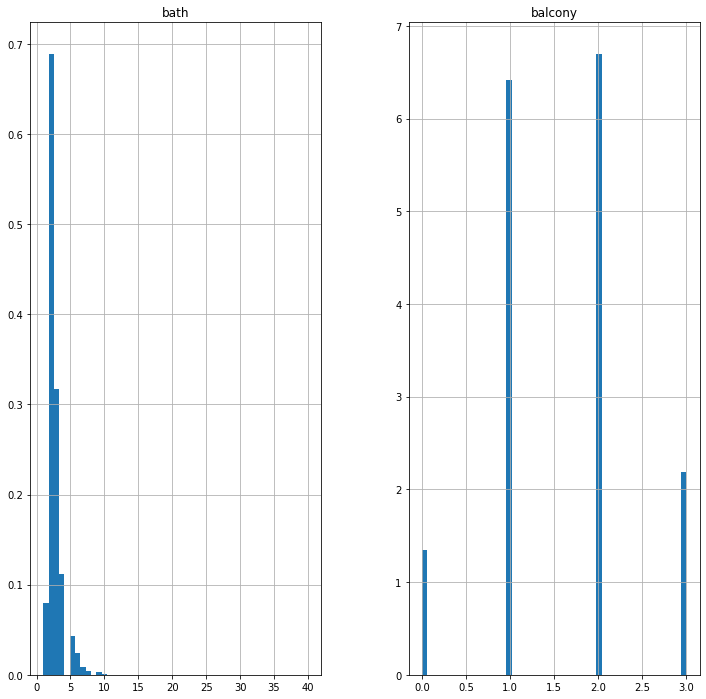

In [21]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()



<AxesSubplot:>

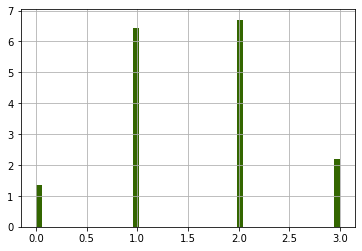

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
the['balcony'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['balcony'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)


<AxesSubplot:ylabel='Density'>

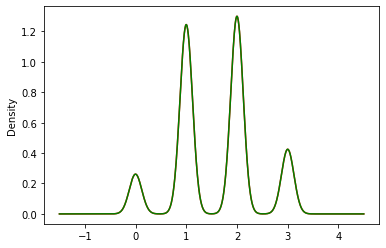

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
the['balcony'].plot.density(color='red')

# data after cca
new_df['balcony'].plot.density(color='green')

<AxesSubplot:>

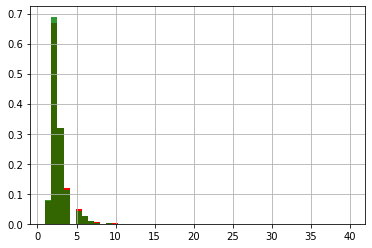

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
the['bath'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['bath'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

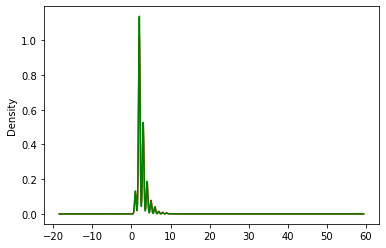

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
the['bath'].plot.density(color='red')

# data after cca
new_df['bath'].plot.density(color='green')

In [30]:
temp = pd.concat([
            # percentage of observations per category, original data
            the['location'].value_counts() / len(the),

            # percentage of observations per category, cca data
            new_df['location'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp.head()

,original,cca
Whitefield,0.040541,0.040441
Sarjapur Road,0.029955,0.029268
Electronic City,0.022673,0.023603
Kanakpura Road,0.020495,0.020535
Thanisandra,0.017568,0.018175


In [31]:
temp = pd.concat([
            # percentage of observations per category, original data
            the['size'].value_counts() / len(the),

            # percentage of observations per category, cca data
            new_df['size'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp.head()

,original,cca
2 BHK,0.390315,0.405350
3 BHK,0.323574,0.324784
4 Bedroom,0.062012,0.058930
4 BHK,0.044369,0.038474
3 Bedroom,0.041066,0.041463
